In [157]:
from compas.datastructures import Mesh
from compas.datastructures import subdivision as sd
from compas_plotters import MeshPlotter
import random

from utilities import draw_compas_mesh

In [158]:
mesh = Mesh()

a = mesh.add_vertex()
b = mesh.add_vertex(x=1)
c = mesh.add_vertex(x=1, y=1)
d = mesh.add_vertex(y=1)

f = mesh.add_face([a, b, c, d])

mesh = sd.mesh_subdivide_corner(mesh)
mesh = sd.mesh_subdivide_quad(mesh)

In [159]:
def plot(m):
    plotter = MeshPlotter(m)
    plotter.draw_edges()
    plotter.draw_faces()
    plotter.show()

In [160]:
import mysubdivision as msd

In [161]:
fkeys = list(mesh.faces())
for fk in fkeys:
    new_keys = msd.taper_face(mesh, fk, height=0, ratio=0.3)
    mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'circulation')
    mesh.set_face_attribute(new_keys[-1], 'ftype', 'construction')

In [162]:
from utilities import export_obj_by_attribute

In [163]:
#export_obj_by_attribute('city.obj', mesh, 'ftype')


In [224]:
def subdivide_by_ftype(mesh):
    fkeys = list(mesh.faces())
    for fk in fkeys:
        ftype = mesh.get_face_attribute(fk, 'ftype')
        #print(ftype)
        if ftype == 'plot':
            new_keys = msd.taper_face(mesh, fk, height=0, ratio=0.3)
            mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'circulation')
            mesh.set_face_attribute(new_keys[-1], 'ftype', 'construction')
        elif ftype=='circulation':
            # style the streets
            pass
        elif ftype =='construction':
            if random.random() < .4:
                # make a park (pyramid park)
                new_keys = msd.pyramid_face(mesh, fk, height=.05)
                mesh.set_faces_attribute(new_keys, 'ftype', 'park')
            else:
                # make a building
                num = random.randint(2,3)
                temp_fk = fk
                for i in range(num):
                    r = random.random() * .4 - .2 # remap
                    new_keys = msd.taper_face(mesh, temp_fk, height=.1, ratio=r)
                    mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'facade')
                    temp_fk = new_keys[-1]
                
                mesh.set_face_attribute(temp_fk, 'ftype', 'roof')
                
        elif ftype == 'park':
            # style the park pyramid
            pass
        elif ftype == 'roof':
            # add a fancy roof
            pass
        elif ftype == 'facade':
            #make a facade
            fvs = mesh.face_vertices(fk)
            facade_length = mesh.edge_length(fvs[0], fvs[1])
            num_subdivision = int(facade_length/0.01)
            if num_subdivision > 1:
                new_keys = msd.segment_face(mesh, fk, num=num_subdivision, start_index=0)
                mesh.set_faces_attribute(new_keys, 'ftype', 'panel')
            else:
                mesh.set_face_attribute(fk, 'ftype', 'panel')

            
  

In [225]:
subdivide_by_ftype(mesh)
#export_obj_by_attribute('city_2.obj', mesh, 'ftype')
draw_compas_mesh(mesh)

Mesh(color=array('white', dtype='<U5'), line_material=ShaderMaterial(), material=ShaderMaterial(side='DoubleSi…

In [226]:
mesh = Mesh()

a = mesh.add_vertex()
b = mesh.add_vertex(x=1)
c = mesh.add_vertex(x=1, y=1)
d = mesh.add_vertex(y=1)

f = mesh.add_face([a, b, c, d])

mesh = sd.mesh_subdivide_corner(mesh)
mesh = sd.mesh_subdivide_quad(mesh)
mesh = sd.mesh_subdivide_corner(mesh)
mesh = sd.mesh_subdivide_quad(mesh)

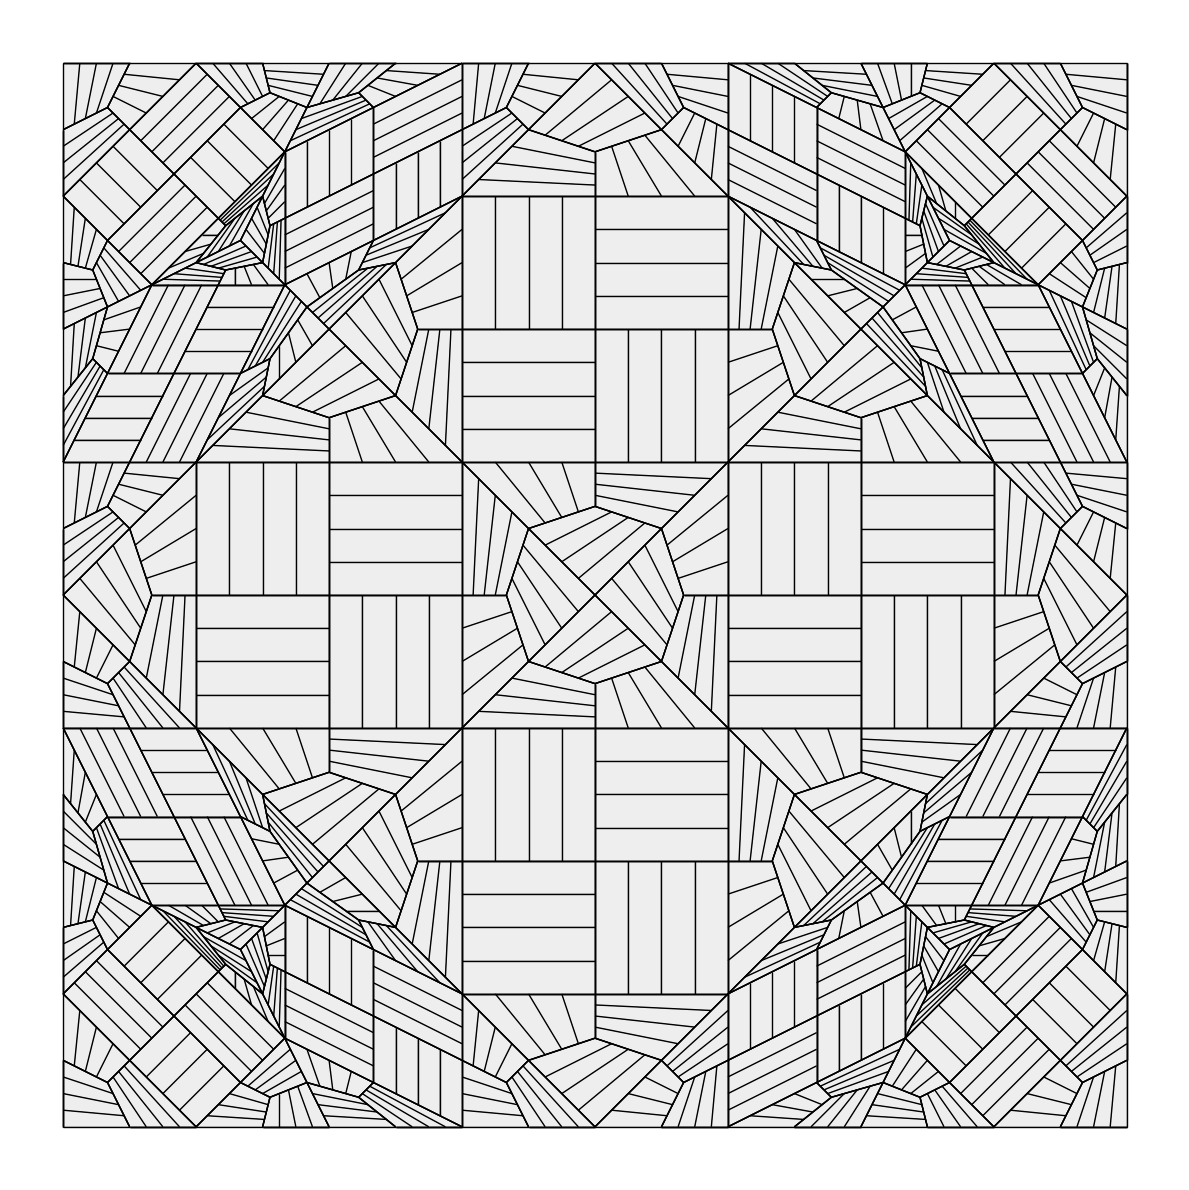

In [231]:


fkeys = list(mesh.faces())
for fk in fkeys:
    new_keys = msd.segment_face(mesh, fk, num=2, start_index=0)
    mesh.set_faces_attribute(new_keys, 'ftype', 'plot')

plot(mesh)

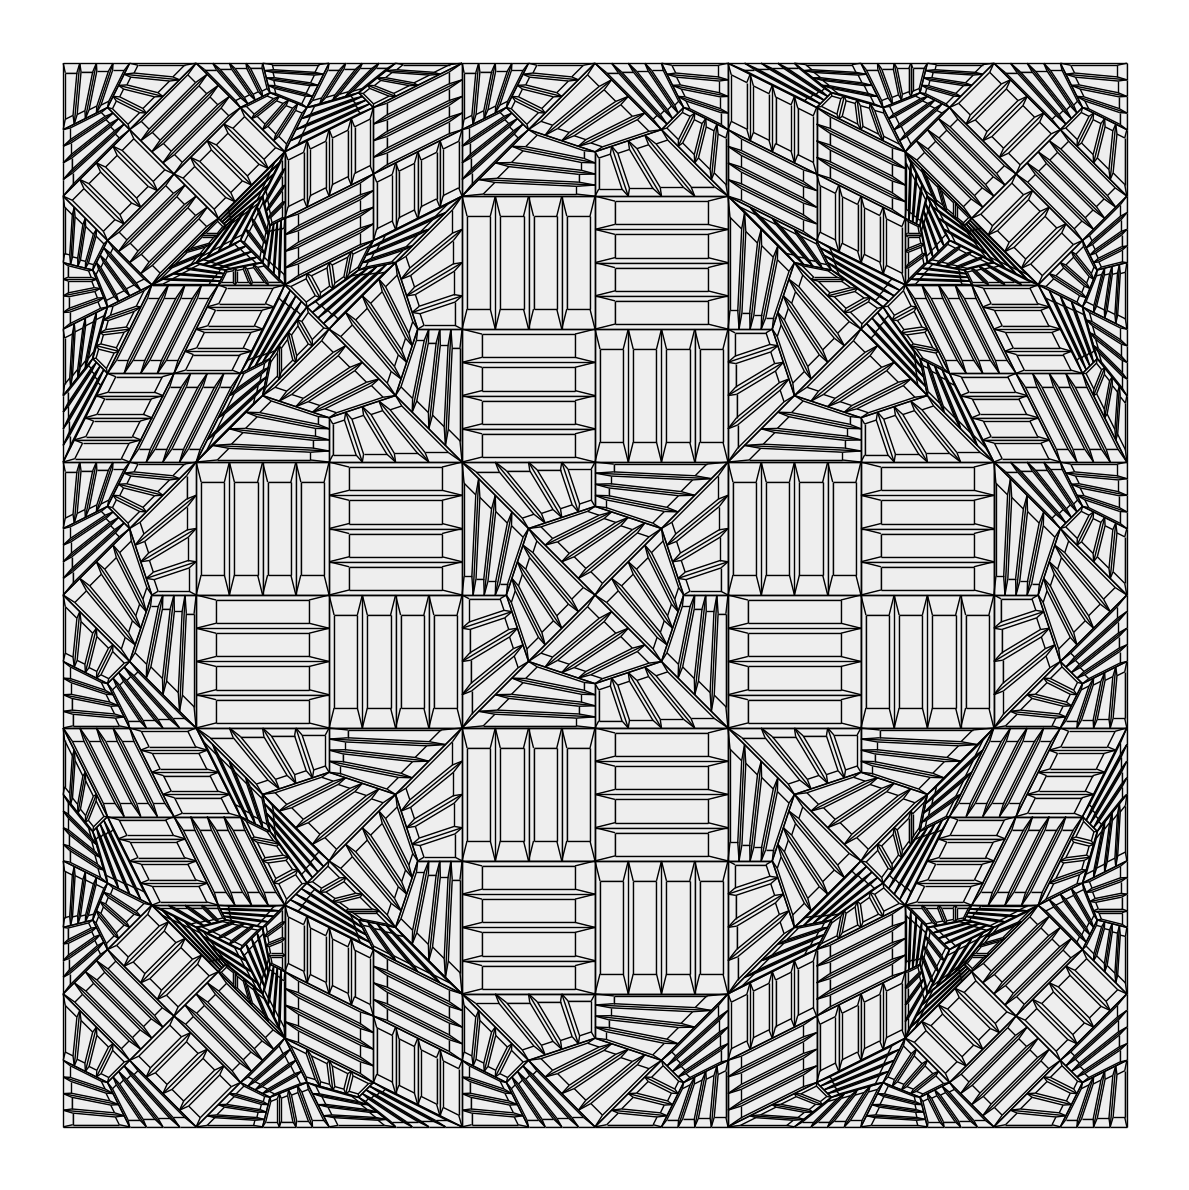

In [232]:
m1 = mesh.copy()
subdivide_by_ftype(m1)
plot(m1)

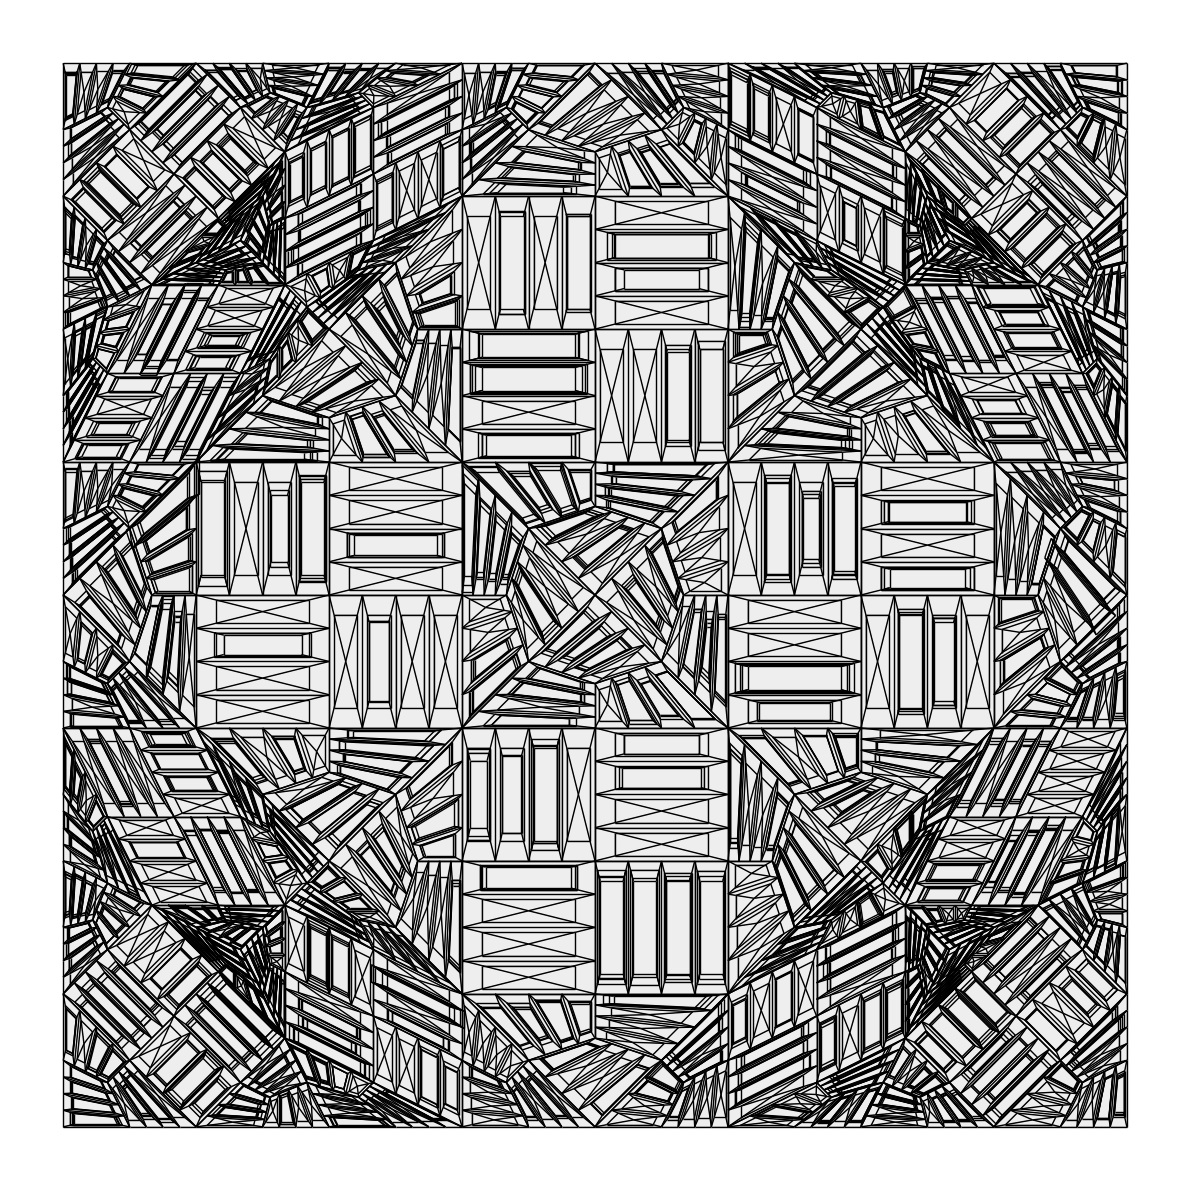

In [233]:
m2 = m1.copy()
subdivide_by_ftype(m2)
plot(m2)

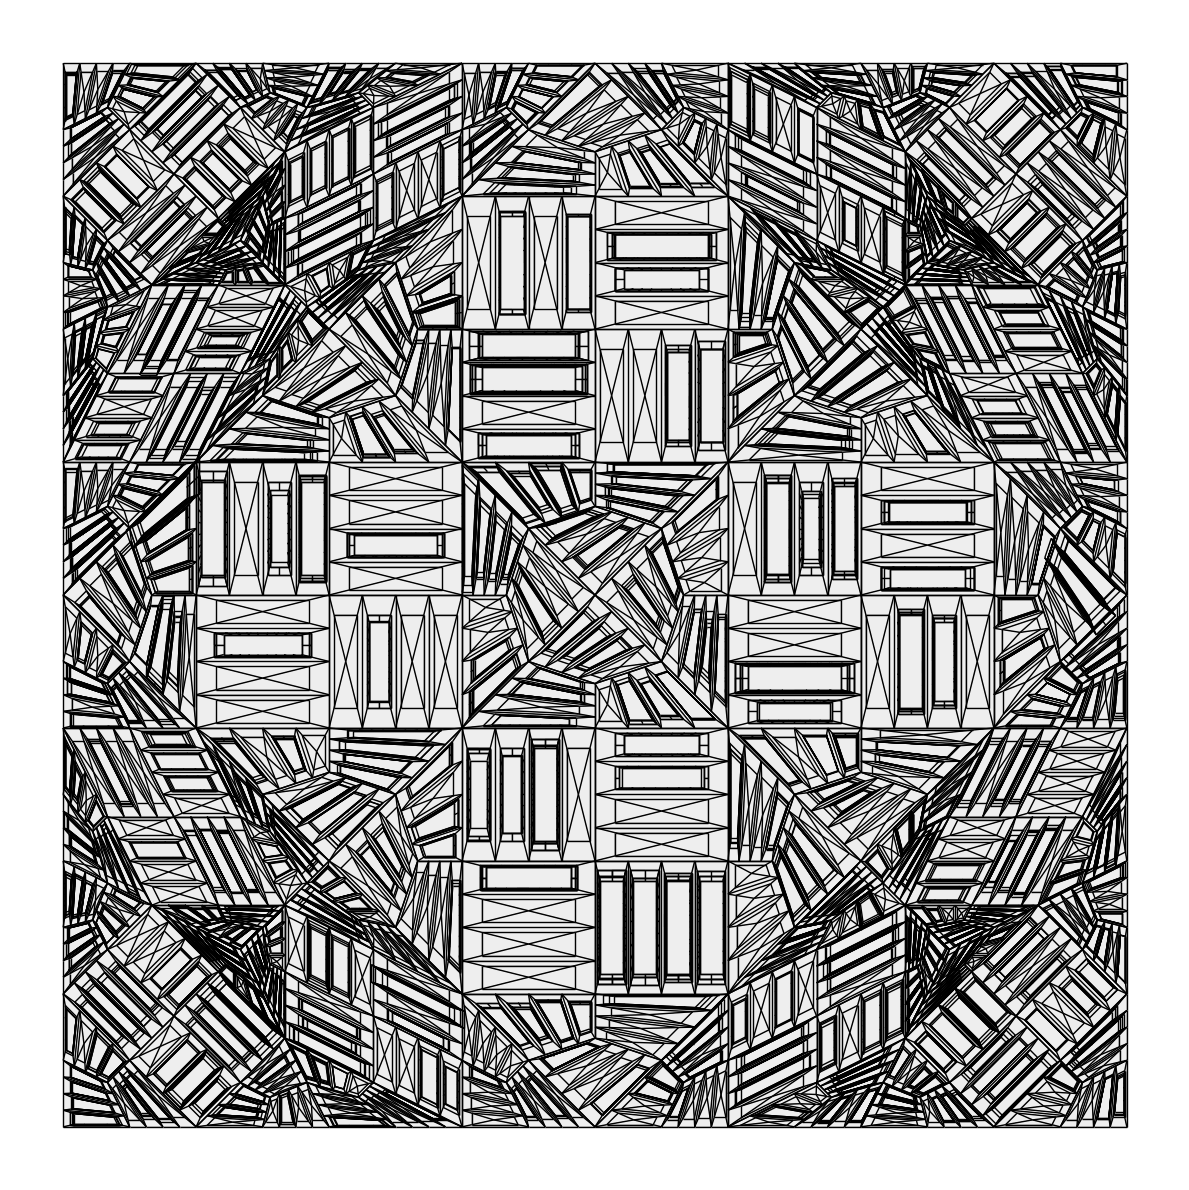

In [234]:
m3 = m2.copy()
subdivide_by_ftype(m3)
plot(m3)

export_obj_by_attribute('city3.obj', m3, 'ftype')